Table of Contents
Executive Summary .................................................................................................................................. 3
Introduction ............................................................................................................................................... 4
Data Quality & Manipulation .................................................................................................................... 5
Model Development .................................................................................................................................. 8
Results ....................................................................................................................................................... 9
Limitations of the models .................................................................................................................... 10
Conclusion ............................................................................................................................................... 10
Appendix ................................................................................................................................................. 12
Import libraries and data ...................................................................................................................... 12
Cleaning the data ................................................................................................................................. 12
Creating a datetime variable............................................................................................................. 12
Dealing with the odd Temperature values ....................................................................................... 13
Normalising Data ............................................................................................................................. 13
Correlation Map ............................................................................................................................... 15
Creating more dimensions for the data ............................................................................................ 16
Random Forest Algorithm ................................................................................................................... 17
One Dimensional Regressor ............................................................................................................. 18
3 Dimensions - Using Week Lag and Day lag ................................................................................. 19
6 dimensional Regression using all Time variables - Hours, Days, Weeks, Months, Years ........... 21
9 Dimensional Regression - Using all variables .............................................................................. 22
9 Dimension Regression - Using all variables 200 trees.................................................................. 23

# Executive Summary

Over 9 million households and businesses rely on the National Energy Market (NEM) each year to power their day to day running and general living. It is undoubtedly beneficial to have an interconnected system across states as it simplifies the management process, however, due to the volatile nature of Australian weather it may also lead to widespread outages and complications if power generation is mismanaged. As such, we have been tasked to predict the weather for Victoria. Our model will ensure that the NEM not only has sufficient power for our state but also gives it the ability to divert power to other states if necessary.

The Bureau of Meteorology has provided us with temperature and demand data for Victoria in 30 minute intervals over the period of 2000 - 2019. This report is a result of the culmination of data over the 20 years. The data has been cleaned accordingly, with all missing values and data pre-2010 removed. Thus, once we obtain a usable data frame a decision needs to be made regarding how training and testing data are split. 

The data is time dependent, meaning if we were to use the train test split function there is a high probability of biased sampling, reducing accuracy in the model. Additionally, due to it’s time dependent nature, randomised sampling for training and testing will not give us representative sets. Therefore, we have decided to split the training and testing as pre-2019 and during 2019, accordingly.

Long term trends are also present. In conjunction with the carbon tax implementation, the Gillard government, along with its successive governments, have pushed a solar panel initiative which has seen the installation of private solar panels skyrocket. This phenomenon in turn precipitates less demand in the NEM and as a result, the demand has a long term downward trend. 


In regards to the variables used for regression, we will be looking at not only temperature but also time, day lag, week lag and day of the week. We have created these additional variables to account for trends in long term data, caused by heat retention and the differing usage habits during different times of the week. Thus, in a realistic context we expect to not only have forecasted weather data but also weather data for the previous day and week, in 30 minute intervals. 

During the model building phase we experimented with various model types before proceeding with a random forest regression, with parameters of 100 decision trees. 

Initially, we only used one variable, temperature, for regression and slowly added other variables to investigate whether it improved the model accuracy, determined by the mean absolute error (MAE). The MAE of the one dimensional model was 0.13, deceptively small as we must remember that these values represent a proportion of normalised demand. The rounded MAE’s of the three, six and finally nine dimension regression are as follows: 0.12, 0.01 and 0.05.


Evidently the addition of  week lag and day lag was not as significant as using the time variables. However, using all 9 variables in conjunction produced a model with a smaller MAE than both the 3 and 6 dimension regressions. This was the best model we could create to predict demand.


![download.png](C:\Users\jonat\ADS1002\download.png)

The figure above is a visualisation of the predicited normalised demand of nine dimensional model, graphed against the actual normalised demand for the year 2019.

From this observation we may conclude that all variables included are significant, each to varying degrees. 
In order to determine the significance of each variable a feature importance analysis was conducted. It cites that hours, day of the week and temperature are the three most important features respectively,  followed by day lag, week lag week, years, day and finally months.


# Introduction


The reason for using a broad term such as “impactful factors” is that we have a myriad of options to consider given the scope of our problem domain: weather and energy demand. Advancements in technology leading to more energy efficient devices and machines. Global warming, leading to steady increases in temperature and thus increase in energy demand from cooling devices and other similar technologies. Further development of Australia and an increase in population will also push up the increase in demand. Evidently, there exists an excessive number of external factors to consider for regression and machine learning modelling. 

The National Energy Market supplies 200 terawatt hours of electricity to 9 million customers each year. It interconnects five regional market jurisdictions - Queensland, New South Wales (including the Australian Capital Territory), Victoria, South Australia, and Tasmania. Evidently the NEM is an integral part of Australia's energy market, meaning supply MUST keep up with demand, there will be major consequences otherwise. As such, to ensure the sufficient provision of energy we must develop an algorithm enabling us to predict demand for the following day based on the next day’s forecasted temperature, today's temperature, the season and other impactful factors. 

Hence, we have decided to specify the field of view of our project; we will only utilise and manipulate data that centrally revolves around temperature. A simple example would be the forecasted temperature of the next day, and a more complex model could also include the day of the week or the temperature of previous days.    

The data set available to us indicates the temperature and demand over 30 minute intervals for the 20 year period of 2000 to the end of 2019, for Victoria, from the Bureau of Meteorology (BoM) Automatic Weather Station (AWS). Another source that was introduced to us was open NEM, which breaks down the electricity demand into their different origins, i.e. solar, wind, hydro etc. Given that the data was provided to us in 30 minute intervals, our prediction outputs shall also be presented as estimates of demand for the next day in 30 minute intervals. 

Given the nature of our data and what we are attempting to explore, it is safe to assume that we will see a positive relationship between temperature and demand. We would also expect a positive relationship between weekdays and demand whilst observing a weaker or negative relationship on weekends. This can be attributed to the fact that NEM also supplies to companies, and companies on work days will use a lot more energy than residents at home on a weekend. Some more complex relationships we may observe include the temperature of the previous day, previous week and the demand for the current day or week. In terms of this relationship, we expect to see a positive relationship for the previous day due to residual heat or heat retention in the city and almost no relationship with the previous week as heat dissipation would have already begun. 

One modelling challenge involved in our project is, as stated earlier, simply looking at the singular variable of forecast temperature is not enough, we must also consider time of day, season and the other variables previously mentioned. To solve this problem we take advantage of the Random Forest Algorithm and run a multivariable regression. 

Another modelling challenge was finding the optimum parameters for our random forest model. This included the optimum amount of trees (n_estimators), max depth, min samples leaf and min leaves, if applicable. A solution to these problems would be to trial and error several logical combinations of each, for example 100 trees, 2 as max depth and leave the rest as default. Once we have these models we can score them and compare each model  to find the ideal parameters. 

# Data Quality & Manipulation

Overall we had a very high quality of data, there was not a large amount of cleaning which took place. 

![head.PNG](C:\Users\jonat\Downloads\images\head.PNG)


As we can see, the minimum for Temperature is -99999.9, meaning that there was no recorded value for that period of time.There also is not one date time variable 

We solve this problem by replacing those values with “Nan” and then drop all Nan values.

![nan.PNG](C:\Users\jonat\Downloads\images\nan.PNG)

The NaN values make up less than 1% of the data so we should be able to drop them with little consequence

Now we have been advised by Roger that for various reasons, the data from 2009 and before are have different trends than 2010 and onwards. So, we have elected to remove all the pre-2010 data. To verify this we plot the demand data over time to visualise any long-term trends which may be in the data. 
 

![trend.PNG](C:\Users\jonat\Downloads\images\trend.PNG)

Evidently there is an upward trend in demand over time. The trend will bias our predictions, as such we will normalise the demand data, then verify the trend has been removed.

![notrend.PNG](C:\Users\jonat\Downloads\images\notrend.PNG)

Before we can begin the modeling, we check the collinearity of the variables to ensure there is as little bias as possible in the model.

![corr.PNG](C:\Users\jonat\Downloads\images\corr.PNG)

The correlation between explanatory variables are weak and hence are unlikely to impact the model.

Due to the limited variables in the data set, additional variables need to be constructed from the current present variables, in order to improve model accuracy. As such, we created four adddtional variables, Week, Day_lag, Week_Lag, and DoW (day of the week). The lagged variables were created by grouping data for each year the data set by weeks and months, then shifting each observation down by one row. These observations where then joined to the data frame. The Week and Day of the Week variables
were created by extracting relevant data from the date-time variable, which was previously created.  

# Model Development

Initially, we experimented with multiple models, such as support vector machines and polynomial models, before deciding to proceed with the Random Forest Regression. Primary factors which influenced this decision were that; we found that the polynomial models were limited in what they could predict and appeared to be overfitted to the training data. The support vector machines were better in this regard, however, depending on the criterion used for the kernels, the time taken was considerable even for the quickest option (linear). 

As such, the Random Forest algorithm presented a relatively fast and sufficiently complex enough model to proceed with the regression. 



To begin we split our data into training and testing sets, where data from January 2011 to December 2018 composed the training set, and data from the year 2019 composed the testing set. We also define a metric function to generate the mean squared error, mean absolute error and R squared metric, make comparing models easier.


![metric.PNG](C:\Users\jonat\Downloads\images\metric.PNG)

Intial efforts involved creating a single variate model using just temperature to predict normalised demand. However, it became apparent that a model fitted to the original data supplied, would only be able to predict to a certain degree, and as such to improve the model, greater dimensionality was required, resulting in the creation of the time-lagged variables and a day of the week variable where 1 would indicate that the day was Monday. 


Subsequent multivariate models were made using various combinations of explanatory variables with the intent of creating more accurate models. Accuracy was measured by the mean squared error (MSE) and mean absolute error (MAE) metrics, following the idea that lower value residuals would imply higher accuracy in the model, and hence a better model. 



As an aside, we used one hundred decision trees in the Random Forest, there is always the possibility that using a greater number of trees would result in a more accurate model. Nevertheless, in a comparison between the final nine dimensional model, where one variation was composed of a hundred decision trees and the other of two hundred trees, we found that the MSE decreased by 0.00004 and the MAE decreased by 0.00018. We did not find these results significant enough to warrant increasing the amount of trees, particularly as the time taken to fit the models were already quite long. 

![100.PNG](C:\Users\jonat\Downloads\images\100.PNG)

![200.PNG](C:\Users\jonat\Downloads\images\200.PNG)

Shown above are the metric for the 100 decision tree variation and 200 decision tree variation. 


Furthermore, to emphasise the influence of the lagged variables, examining the feature importance of the nine dimensional model shows the additional variable for temperature lagged by a day and day of the week, relative to other variables are ranked 4th and 2nd in terms of importance. 


# Results

The arrays outputted by the various models were plotted against the aforementioned testing set. However, due to the density/size of the testing set, it was difficult to discern the accuracy/results of the models from the figures, so to quantify the results, the mean squared error and mean absolute error were used. In general, we found that as more dimensions were added to the model, the metrics would improve. With the final model composed of a hundred decision trees and the nine variables: Temperature, Hours, Days, Week, Months, Years, Day_lag, Week_Lag, and DoW (day of the week variable), having a mean squared error of 0.00489 the normalised demand, and a mean absolute error of  0.04984. 

![final.PNG](C:\Users\jonat\Downloads\images\final.PNG)

The above figure is the visualisation of the nine dimensional regression plotted against the actual demand values for 2019, and its metrics.

## Limitations of the models

Limitations in the model are that it is only capable of predicting in half-hourly intervals, which may not be as useful in a real-world setting. In reality, a daily or even hourly prediction may be more influential in decision making depending on how the energy is generated and how long it takes to be generated. Coal power plants may need a longer period of time - more forewarning - in order to increase power generation to meet demand. In this scenario, a daily predictor model would be more appreciated; however, there must be some consideration to the trade off of accuracy and utility, as forecasting for longer periods into the future, reduces accuracy. 

# Conclusion

Through observation of our final 9 variable regression model we can safely conclude that simply having temperature and demand are insufficient for creating proper and usable predictions. This is proven by the aforementioned mean squared errors of each model. Furthermore, our feature importance outputs indicate that day of the week, Hours and Temperature are the most impactful variables. 

Overall, in terms of the scope of the goal of creating a model to forecast energy demand for the next period in half-hourly intervals, the nine dimensional model composed of a hundred estimators represents an adequate solution with a rounded mean absolute error of just 0.05.

Future endevors to forecast demand, may experiment with the opimisation of this model to further reduce the error margin. Moreover, different model types, such as a deep learning implementation may yield a smaller error margin. 


# Appendix


## Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
import seaborn as sns
from IPython.display import display, Latex

In [2]:
df = pd.read_csv('VICdemand.csv')

## Cleaning the data

In [3]:
df.head()

,Years,Months,Days,Hours,Minutes,Demand,Temperature
0,2000,1,1,0,0,4511.3,-99999.9
1,2000,1,1,0,30,4419.0,13.7
2,2000,1,1,1,0,4312.5,13.6
3,2000,1,1,1,30,4599.7,13.3
4,2000,1,1,2,0,4479.0,14.1


### Creating a datetime variable

In [4]:
#Create an empty data frame
df_d= pd.DataFrame()
#Create columns recording all the time data 
df_d['Years']= df['Years']
df_d['Months']= df['Months']
df_d['Days'] = df['Days']
df_d['Hours'] = df['Hours']
df_d['Minutes'] = df['Minutes']

#Create a new data frame with a time column using datetime values 
#by the to_datetime function in pandas
df_d= pd.DataFrame(pd.to_datetime(df_d), columns=['Time'])

#Concatenate the data frames
df = pd.concat([df, df_d], axis=1)

In [5]:
df.head()

,Years,Months,Days,Hours,Minutes,Demand,Temperature,Time
0,2000,1,1,0,0,4511.3,-99999.9,2000-01-01 00:00:00
1,2000,1,1,0,30,4419.0,13.7,2000-01-01 00:30:00
2,2000,1,1,1,0,4312.5,13.6,2000-01-01 01:00:00
3,2000,1,1,1,30,4599.7,13.3,2000-01-01 01:30:00
4,2000,1,1,2,0,4479.0,14.1,2000-01-01 02:00:00


### Dealing with the odd Temperature values


In [6]:
#First lets change all the -99999.9 values to NaN
df.replace(to_replace=-99999.9, value=np.NaN,inplace= True)
#Now we can see the extent of the NaN values and decide how to
#deal with them 
df.isnull().sum()

Years             0
Months            0
Days              0
Hours             0
Minutes           0
Demand            8
Temperature    1283
Time              0
dtype: int64

In [7]:
df.shape

(350640, 8)

In [8]:
df = df.dropna()

### Normalising Data

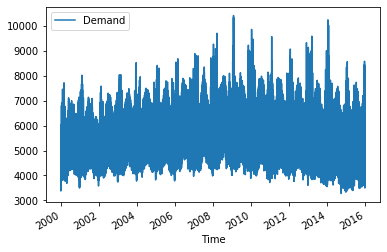

In [9]:
df.query('Years <= 2015').plot.line(x='Time', y='Demand')

In [10]:
warnings.filterwarnings('ignore')
#Seperate the years by creating individual dataframes for each year
y_10 = df.query('Years == 2010')
y_11 = df.query('Years == 2011')
y_12 = df.query('Years == 2012')
y_13 = df.query('Years == 2013')
y_14 = df.query('Years == 2014')
y_15 = df.query('Years == 2015')
y_16 = df.query('Years == 2016')
y_17 = df.query('Years == 2017')
y_18 = df.query('Years == 2018')
y_19 = df.query('Years == 2019')

#Divide the demand by the average of its year for each year
for dfs in [y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19]:
    mean = dfs['Demand'].mean()
    dfs['Demand']= dfs['Demand']/mean

#Now we can create a new dataframe by appending all the normalised data
new_df = pd.DataFrame()
for dfs in [y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19]:
    new_df  = new_df.append(dfs)
    

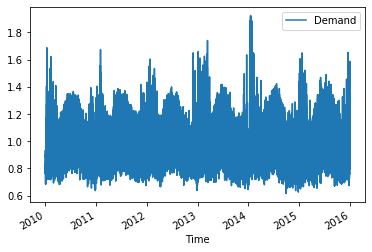

In [11]:
new_df.query('Years <= 2015').plot.line(x='Time', y='Demand')

### Correlation Map 

In [12]:
new_df.loc[:, df.columns != 'Time'].corr()

,Years,Months,Days,Hours,Minutes,Demand,Temperature
Years,1.000000e+00,-0.001238,0.001254,0.000248,0.000021,5.079682e-15,-0.014606
Months,-1.237520e-03,1.000000,0.011906,-0.000084,0.000021,-1.033227e-01,-0.215399
Days,1.253740e-03,0.011906,1.000000,0.000148,0.000091,-2.785461e-04,-0.004736
Hours,2.476508e-04,-0.000084,0.000148,1.000000,-0.000031,4.134440e-01,0.210163
Minutes,2.099173e-05,0.000021,0.000091,-0.000031,1.000000,2.678822e-03,0.000059
Demand,5.079682e-15,-0.103323,-0.000279,0.413444,0.002679,1.000000e+00,0.184492
Temperature,-1.460575e-02,-0.215399,-0.004736,0.210163,0.000059,1.844915e-01,1.000000


### Creating more dimensions for the data


In [13]:
#Create a Week Variable
new_df['Week']= new_df['Time'].dt.week

In [14]:
#Create Grouped Data Frames
md_df = new_df.groupby([new_df['Years'], new_df['Week']]).mean().drop(columns =['Week', 'Years']).reset_index()
sum_df= new_df.groupby([new_df['Years'], new_df['Months'], new_df['Days']]).mean().reset_index()
daily_avg_df = new_df.groupby([new_df['Years'], new_df['Months'], new_df['Days']]).mean().reset_index()

daily_avg_df['Daily_avg'] = daily_avg_df['Temperature']
daily_avg_df = daily_avg_df[['Years','Months', 'Days', 'Daily_avg']]

In [15]:
#shift the temperature observations to create the lag
sum_df['Lag']=sum_df['Temperature'].shift(1)
md_df['Lag']=md_df['Temperature'].shift(1)

#Save relevant observations to a new data frame
weekly_df=pd.DataFrame()
weekly_df['Years'], weekly_df['Week'], weekly_df['Week_Lag'] = md_df['Years'], md_df['Week'], md_df['Lag']

daily_df=pd.DataFrame()
daily_df['Years'], daily_df['Week'],daily_df['Days'], daily_df['Day_lag'] = sum_df['Years'], sum_df['Week'], sum_df['Days'], sum_df['Lag']

#Merge everything to one dataframe 
new_df = pd.merge(new_df, daily_df, how='left', on=['Years', 'Week', 'Days'])
new_df = pd.merge(new_df, weekly_df, how='left', on=['Years', 'Week'])
new_df =pd.merge(new_df, daily_avg_df, how='left', on=['Years','Months', 'Days'])

#Create a day of the week Variable where 1 is Monday and 7 is Sunday
new_df['DoW'] = new_df['Time'].dt.dayofweek+1

In [16]:
new_df.head()

,Years,Months,Days,Hours,Minutes,Demand,Temperature,Time,Week,Day_lag,Week_Lag,Daily_avg,DoW
0,2010,1,1,0,0,0.928249,20.9,2010-01-01 00:00:00,53,NaN,19.257917,19.854167,5
1,2010,1,1,0,30,0.874345,21.2,2010-01-01 00:30:00,53,NaN,19.257917,19.854167,5
2,2010,1,1,1,0,0.848513,21.5,2010-01-01 01:00:00,53,NaN,19.257917,19.854167,5
3,2010,1,1,1,30,0.903837,22.5,2010-01-01 01:30:00,53,NaN,19.257917,19.854167,5
4,2010,1,1,2,0,0.863242,22.3,2010-01-01 02:00:00,53,NaN,19.257917,19.854167,5


In [17]:
# We can now check the correlation between the variables and demand to determine expected relationships
new_df.corr()['Demand'].round(5)

Years          0.00000
Months        -0.10332
Days          -0.00028
Hours          0.41344
Minutes        0.00268
Demand         1.00000
Temperature    0.18449
Week          -0.10086
Day_lag       -0.08404
Week_Lag      -0.15035
Daily_avg     -0.03850
DoW           -0.26684
Name: Demand, dtype: float64

## Random Forest Algorithm


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [19]:
#Create the training and testing dataframes 
df_train= new_df.query('Years != 2019 and Years > 2010')
df_test = new_df.query('Years == 2019')

In [20]:
#Create a metric function to assess the models
def get_metrics(model_lst):
    '''Input: List of models
        Output: Metrics'''
    lst = [metrics.mean_squared_error, metrics.mean_absolute_error, metrics.r2_score]
    names =['MSE', 'MAE', 'R2']
    out = [[] for i in range(len(model_lst))]
    for model in range(len(out)):
        for func in range(len(lst)): #For each model loops through the metric function lst
            out[model]+=  [names[func], round(lst[func](df_test['Demand'], model_lst[model]), 5)]
            
    return(out)


### One Dimensional Regressor

In [21]:
#Define the training and testing data (x1 & y1 are testing set)
one_dim_x, y = df_train['Temperature'], df_train['Demand']
one_dim_x1, y1 = df_test['Temperature'], df_test['Demand']

In [22]:
one_dim_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) #Make some tea, it takes 1 minutes
one_dim_regressor.fit(one_dim_x.values.reshape(-1, 1), y.values.reshape(-1, 1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

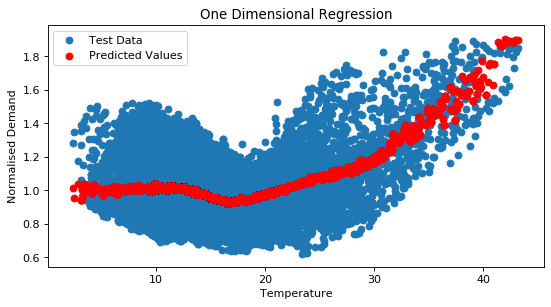

In [23]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1= plt.scatter(one_dim_x1.values.reshape(-1,1), y1, label='Test Data')
ax2= plt.scatter(one_dim_x1.values.reshape(-1,1), one_dim_regressor.predict(one_dim_x1.values.reshape(-1,1)), color='red', label='Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Normalised Demand')
plt.title('One Dimensional Regression')
plt.legend()

In [24]:
get_metrics([one_dim_regressor.predict(one_dim_x1.values.reshape(-1,1))])

[['MSE', 0.02519, 'MAE', 0.12895, 'R2', 0.20955]]

### 3 Dimensions - Using Week Lag and Day lag

In [25]:
#Define data frames
lag_x = df_train[['Temperature','Week_Lag', 'Day_lag']]
lag_x1 = df_test[['Temperature','Week_Lag', 'Day_lag']]

In [26]:
regressor_lag = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor_lag.fit(lag_x.values.reshape(-1, 3), y.values.reshape(-1, 1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

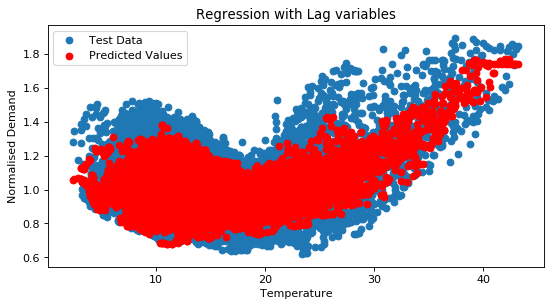

In [27]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1= plt.scatter(lag_x1['Temperature'], y1, label='Test Data')
ax2= plt.scatter(lag_x1['Temperature'], regressor_lag.predict(lag_x1), color='red', label='Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Normalised Demand')
plt.title('Regression with Lag variables')
plt.legend()

In [28]:
get_metrics([regressor_lag.predict(lag_x1)])

[['MSE', 0.02448, 'MAE', 0.12408, 'R2', 0.23187]]

### 6 dimensional Regression using all Time variables - Hours, Days, Weeks, Months, Years

In [29]:
time_x= df_train[['Temperature', 'Hours', 'Days','Week', 'Months', 'Years']]
time_x1 = df_test[['Temperature', 'Hours', 'Days', 'Week', 'Months', 'Years']]

In [30]:
regressor_time = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor_time.fit(time_x.values.reshape(-1, 6), y.values.reshape(-1, 1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

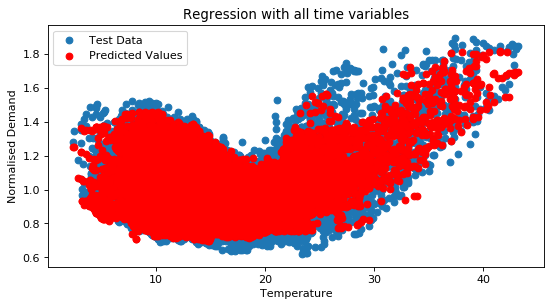

In [31]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1= plt.scatter(time_x1['Temperature'], y1, label='Test Data')
ax2= plt.scatter(time_x1['Temperature'], regressor_time.predict(time_x1), color='red', label='Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Normalised Demand')
plt.title('Regression with all time variables')
plt.legend()

In [32]:
get_metrics([regressor_time.predict(time_x1)])

[['MSE', 0.00963, 'MAE', 0.07081, 'R2', 0.6977]]

### 9 Dimensional Regression - Using all variables

In [33]:
master_x = df_train[['Temperature', 'Hours', 'Days','Week', 'Months', 'Years', 'Day_lag', 'Week_Lag', 'DoW']]
master_x1 = df_test[['Temperature', 'Hours', 'Days','Week', 'Months', 'Years', 'Day_lag', 'Week_Lag', 'DoW']]

In [34]:
regressor_master = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor_master.fit(master_x.values.reshape(-1, 9), y.values.reshape(-1, 1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

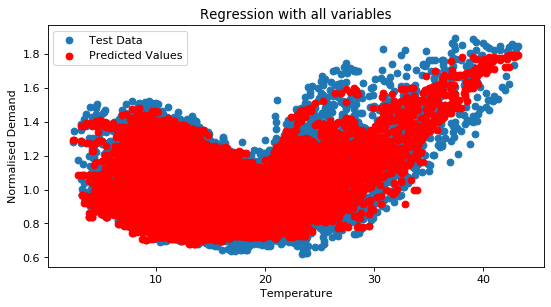

In [35]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1= plt.scatter(master_x1['Temperature'], y1, label='Test Data')
ax2= plt.scatter(master_x1['Temperature'], regressor_master.predict(master_x1), color='red', label='Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Normalised Demand')
plt.title('Regression with all variables')
plt.legend()

In [36]:
get_metrics([regressor_master.predict(master_x1)])

[['MSE', 0.00489, 'MAE', 0.04984, 'R2', 0.8466]]

In [37]:
regressor_master.feature_importances_

array([0.14957724, 0.44862215, 0.01699386, 0.05532519, 0.0131978 ,
       0.01984439, 0.11139624, 0.02324257, 0.16180055])

### 9 Dimension Regression - Using all  variables 200 trees

In [38]:
regressor_master_200 = RandomForestRegressor(n_estimators = 200, random_state = 0) 
regressor_master_200.fit(master_x.values.reshape(-1, 9), y.values.reshape(-1, 1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

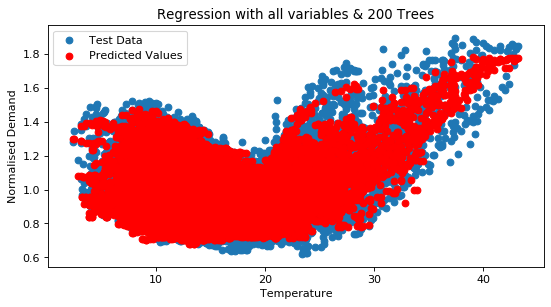

In [39]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1= plt.scatter(master_x1['Temperature'], y1, label='Test Data')
ax2= plt.scatter(master_x1['Temperature'], regressor_master_200.predict(master_x1), color='red', label='Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Normalised Demand')
plt.title('Regression with all variables & 200 Trees')
plt.legend()

In [40]:
get_metrics([regressor_master_200.predict(master_x1)])

[['MSE', 0.00485, 'MAE', 0.04966, 'R2', 0.84785]]